# Preparing file with Estimated population

**Next modifications will be applied to the PEA04.csv file:**
* removing rows that cotain data splitted by sex
* In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
* Renaming last column with values
* Multipliyng values by 1000
* Export DataFrame to a csv File

**Note:** Please check "Data overview" Jupiter Notebook for reference

In [67]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [177]:
#Creating a DataFrame from file with Estimated Population statistic and displaing random rows
df_pop = pd.read_csv("PEA04.csv")
df_pop.sample(8)

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
6560,Estimated Population (Persons in April),2023,70 - 74 years,Female,Midland,Thousand,6.4
3476,Estimated Population (Persons in April),2017,70 - 74 years,Female,West,Thousand,8.7
1805,Estimated Population (Persons in April),2014,45 - 49 years,Female,South-West,Thousand,23.0
4428,Estimated Population (Persons in April),2019,60 - 64 years,Both sexes,State,Thousand,255.9
5723,Estimated Population (Persons in April),2022,10 - 14 years,Female,Midland,Thousand,12.2
1128,Estimated Population (Persons in April),2013,15 - 19 years,Female,Mid-West,Thousand,14.8
3544,Estimated Population (Persons in April),2017,85 years and over,Both sexes,Mid-East,Thousand,7.4
6467,Estimated Population (Persons in April),2023,55 - 59 years,Male,South-West,Thousand,23.4


In [178]:
#Explore information about the DataFrame, i.e. nr of rows, nr of not null values, data types for columns, etc...
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


In [179]:
#removing rows that reflect data splitted by sex and leaving only data related to both sexes. 

df_pop = df_pop.drop(df_pop[(df_pop["Sex"] != "Both sexes")].index)

#Checking and comparing nr of rows

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 0 to 6650
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  2223 non-null   object 
 1   Year             2223 non-null   int64  
 2   Age Group        2223 non-null   object 
 3   Sex              2223 non-null   object 
 4   Region           2223 non-null   object 
 5   UNIT             2223 non-null   object 
 6   VALUE            2223 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 138.9+ KB


In [180]:
#it should be 1/3 left and it's corerct
6669/3

2223.0

In [181]:
#quick check for left data
df_pop["Sex"].unique()

array(['Both sexes'], dtype=object)

In [182]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_pop = df_pop.replace('State', 'Ireland')

In [183]:
df_pop = df_pop.replace('Midland', 'Midlands')

In [184]:
#Renaming last column with values
df_pop = df_pop.rename(columns={'VALUE': 'Estimated Population nr'})

In [185]:
#Multipliyng values by 1000
df_pop['Estimated Population nr'] = df_pop['Estimated Population nr'].mul(1000)

In [186]:
#Now we have 'Number' as a UNIT
df_pop = df_pop.replace('Thousand', 'Number')

In [187]:
#Checking region values
df_pop.Region.unique()

array(['Ireland', 'Border', 'West', 'Mid-West', 'South-East',
       'South-West', 'Dublin', 'Mid-East', 'Midlands'], dtype=object)

In [188]:
#last final check 
df_pop.sample(8)

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,Estimated Population nr
5649,Estimated Population (Persons in April),2022,0 - 4 years,Both sexes,Dublin,Number,81600.0
5,Estimated Population (Persons in April),2011,0 - 4 years,Both sexes,South-West,Number,50100.0
2463,Estimated Population (Persons in April),2015,75 - 79 years,Both sexes,Dublin,Number,30300.0
5947,Estimated Population (Persons in April),2022,55 - 59 years,Both sexes,Mid-East,Number,46100.0
4511,Estimated Population (Persons in April),2019,75 - 79 years,Both sexes,West,Number,13500.0
6298,Estimated Population (Persons in April),2023,25 - 29 years,Both sexes,Mid-East,Number,38900.0
4813,Estimated Population (Persons in April),2020,35 - 39 years,Both sexes,Mid-East,Number,58600.0
4108,Estimated Population (Persons in April),2019,0 - 4 years,Both sexes,South-East,Number,25700.0


In [189]:
pop_grouped = df_pop.groupby("Year")["Estimated Population nr"].sum()
pop_grouped

Year
2011    18299600.0
2012    18374100.0
2013    18459100.0
2014    18582000.0
2015    18751100.0
2016    18959100.0
2017    19243400.0
2018    19539800.0
2019    19834400.0
2020    20120000.0
2021    20298800.0
2022    20735500.0
2023    21126500.0
Name: Estimated Population nr, dtype: float64

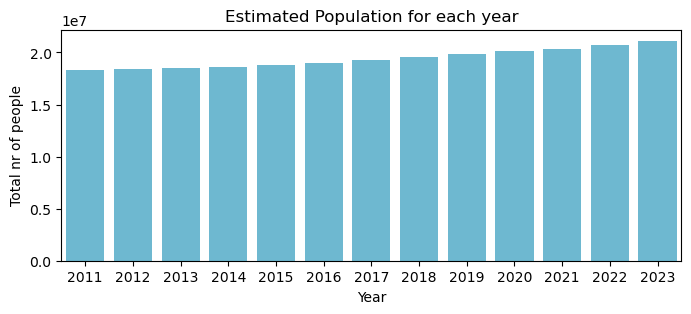

In [190]:
# Create a bar plot of the sum of population for each year
plt.figure(figsize=(8, 3))
sns.barplot(x=pop_grouped.index, y=pop_grouped.values, color="#5ec0e0")
plt.xlabel("Year")
plt.ylabel("Total nr of people")
plt.title("Estimated Population for each year")
plt.show()

In [191]:
pop_agg = df_pop.groupby(['Year', 'Region'])['Estimated Population nr'].sum()

pop_agg.head()

Year  Region  
2011  Border       784000.0
      Dublin      2523000.0
      Ireland     9149700.0
      Mid-East    1314900.0
      Mid-West     933600.0
Name: Estimated Population nr, dtype: float64

In [192]:
pop_agg = pop_agg.reset_index(drop=False)
pop_agg.head()

,Year,Region,Estimated Population nr
0,2011,Border,784000.0
1,2011,Dublin,2523000.0
2,2011,Ireland,9149700.0
3,2011,Mid-East,1314900.0
4,2011,Mid-West,933600.0


In [193]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop = pop_agg.sort_values(by=['Year'], ascending=True)
# Reset the index of the DataFrame 'df_pop'
df_pop = df_pop.reset_index(drop=True)
df_pop.head()

,Year,Region,Estimated Population nr
0,2011,Border,784000.0
1,2011,Dublin,2523000.0
2,2011,Ireland,9149700.0
3,2011,Mid-East,1314900.0
4,2011,Mid-West,933600.0


In [194]:
#Export DataFrame to a csv File
df_pop.to_csv("PEA04_c.csv", index = False)

# SECOND FILE

In [195]:
#Creating a DataFrame from file with Estimated Population statistic and displaing random rows
df_pop1 = pd.read_csv("PEA07.csv")
df_pop1.head(8)

,Statistic Label,Age Group,Sex,Regional Authority Area,Year,UNIT,VALUE
0,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1996,Thousand,250.4
1,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1997,Thousand,250.0
2,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1998,Thousand,253.7
3,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1999,Thousand,259.8
4,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2000,Thousand,266.2
5,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2001,Thousand,273.2
6,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2002,Thousand,277.6
7,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2003,Thousand,284.3


In [196]:
#Explore information about the DataFrame, i.e. nr of rows, nr of not null values, data types for columns, etc...
df_pop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11286 entries, 0 to 11285
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          11286 non-null  object 
 1   Age Group                11286 non-null  object 
 2   Sex                      11286 non-null  object 
 3   Regional Authority Area  11286 non-null  object 
 4   Year                     11286 non-null  int64  
 5   UNIT                     11286 non-null  object 
 6   VALUE                    11286 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 617.3+ KB


In [197]:
df_pop1["Year"].unique()

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [198]:
#removing rows that reflect data splitted by sex and leaving only data related to both sexes. 

df_pop1 = df_pop1.drop(df_pop1[(df_pop1["Sex"] != "Both sexes")].index)

#Checking and comparing nr of rows

df_pop1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762 entries, 0 to 10889
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          3762 non-null   object 
 1   Age Group                3762 non-null   object 
 2   Sex                      3762 non-null   object 
 3   Regional Authority Area  3762 non-null   object 
 4   Year                     3762 non-null   int64  
 5   UNIT                     3762 non-null   object 
 6   VALUE                    3762 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 235.1+ KB


In [199]:
11286/3

3762.0

In [200]:
#quick check for left data
df_pop1["Sex"].unique()

array(['Both sexes'], dtype=object)

In [201]:
#removing rows that reflect data splitted by sex and leaving only data related to both sexes. 

df_pop1 = df_pop1.drop(df_pop1[(df_pop1["Year"] != 2007) & (df_pop1["Year"] != 2008) & 
                               (df_pop1["Year"] != 2009) & (df_pop1["Year"] != 2010)].index)
                            
#Checking and comparing nr of rows
df_pop1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 11 to 10882
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          684 non-null    object 
 1   Age Group                684 non-null    object 
 2   Sex                      684 non-null    object 
 3   Regional Authority Area  684 non-null    object 
 4   Year                     684 non-null    int64  
 5   UNIT                     684 non-null    object 
 6   VALUE                    684 non-null    float64
dtypes: float64(1), int64(1), object(5)
memory usage: 42.8+ KB


In [202]:
df_pop1["Year"].unique()

array([2007, 2008, 2009, 2010], dtype=int64)

In [203]:
pop_agg = df_pop1.groupby(['Year', 'Regional Authority Area'])['VALUE'].sum()

pop_agg.head()

Year  Regional Authority Area
2007  Border                      967.7
      Dublin                     2462.5
      Mid-East                    992.1
      Mid-West                    733.0
      Midland                     524.6
Name: VALUE, dtype: float64

In [204]:
pop_agg = pop_agg.reset_index(drop=False)
pop_agg.head()

,Year,Regional Authority Area,VALUE
0,2007,Border,967.7
1,2007,Dublin,2462.5
2,2007,Mid-East,992.1
3,2007,Mid-West,733.0
4,2007,Midland,524.6


In [205]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop1 = pop_agg.sort_values(by=['Year'], ascending=True)
# Reset the index of the DataFrame 'df_pop'
df_pop1 = df_pop1.reset_index(drop=True)
df_pop1.head()

,Year,Regional Authority Area,VALUE
0,2007,Border,967.7
1,2007,Dublin,2462.5
2,2007,Mid-East,992.1
3,2007,Mid-West,733.0
4,2007,Midland,524.6


In [206]:
df_pop1 = df_pop1.rename(columns={'VALUE': 'Estimated Population nr','Regional Authority Area': 'Region'})

In [207]:
df_pop1.head()

,Year,Region,Estimated Population nr
0,2007,Border,967.7
1,2007,Dublin,2462.5
2,2007,Mid-East,992.1
3,2007,Mid-West,733.0
4,2007,Midland,524.6


In [208]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_pop1 = df_pop1.replace('State', 'Ireland')

In [209]:
df_pop1 = df_pop1.replace('Midland', 'Midlands')

In [210]:
#Multipliyng values by 1000
df_pop1['Estimated Population nr'] = df_pop1['Estimated Population nr'].mul(1000)

In [211]:
df = pd.concat([df_pop, df_pop1], ignore_index=True)

In [212]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df = df.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df = df.reset_index(drop=True)

In [213]:
df.head()

,Year,Region,Estimated Population nr
0,2007,West,846400.0
1,2007,Dublin,2462500.0
2,2007,Mid-East,992100.0
3,2007,Mid-West,733000.0
4,2007,Midlands,524600.0


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     153 non-null    int64  
 1   Region                   153 non-null    object 
 2   Estimated Population nr  153 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


In [214]:
#Export DataFrame to a csv File
df.to_csv("PEA_c.csv", index = False)